In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

In [3]:
import os
import numpy as np
import pandas as pd
import glob
import math

import sys
sys.path.insert(0, '../')

import time
from utils import timeSince
from tqdm import tqdm

In [4]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline


In [5]:
from rnn_module_id import ModuleIDBasedRNN
from rnn_module_id import load_training
from rnn_module_id import input_target
from rnn_module_id import modules

In [6]:
from utils import tunable_parameters

In [7]:
model = ModuleIDBasedRNN(input_dim=modules+1,
                         hidden_dim=20,
                         output_dim=modules+1,
                         batch_size=1)

In [8]:
train_data = load_training()
print("Total events:", len(train_data))
print("Total truth particles:", sum([y.shape[0] for x,y in train_data]))

Total events: 1770
Total truth particles: 14496495


In [9]:
event, truth = train_data[1000]

In [10]:
print(event.shape)
print(truth.shape)
print(type(event))
print(type(truth))

(97565, 2)
(8931,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
hits = event[event['particle_id'] == truth.values[0]]['uID'].values

In [12]:
print(len(hits))
print(hits)

11
[  871  1242  1854  2873  2874  5552  6659  8226 10434 14614 18022]


In [13]:
def predict(model, input, batch_size=1):
    with torch.no_grad():
        
        model.hidden = model.init_hidden()
        output = model(input)
        print(output.size())
        topv, topi = output.topk(3)
        return topi
#         cand = topi[0][0]
#         return cand.item()

In [14]:
input, target = input_target(hits)
model_version = 'RNNModule_9'

In [15]:
model_input = 'output/model/'+model_version
model.load_state_dict(torch.load(model_input, map_location=lambda storage, loc: storage))

In [16]:
topi = predict(model, input)

torch.Size([11, 18729])


In [17]:
print(topi.size())

torch.Size([11, 3])


In [18]:
print(topi)

tensor([[   872,   1210,   1211],
        [  1211,   1854,   1802],
        [  1855,   1854,   2796],
        [ 18728,   5472,   5473],
        [ 18728,   5472,   5512],
        [ 18728,   6492,   6491],
        [ 18728,   6492,   5244],
        [ 18728,   1265,   1233],
        [ 18728,   1265,   1233],
        [ 18728,    149,    146],
        [ 18728,   1693,   1641]])


In [19]:
losses_input = 'output/loss/'+model_version
import pickle
losses = pickle.load(open(losses_input, 'rb'))

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

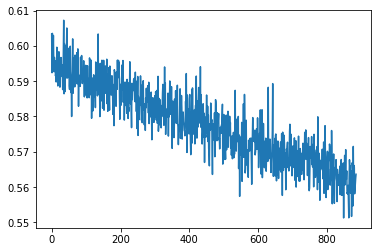

In [26]:
plt.plot(losses)